# RNN with Gate

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 기울기 폭발

In [12]:
N = 2
H = 3
T = 20

dh = np.ones((N,H))
np.random.seed(3)
Wh = np.random.randn(H,H)

norm_list = []
for t in range(T) :
    dh = np.matmul(dh,Wh.T) # T번 반복됨
    norm = np.sqrt(np.sum(dh**2)) / N # 미니배치(N개)의 평균 'L2노름'
    norm_list.append(norm)

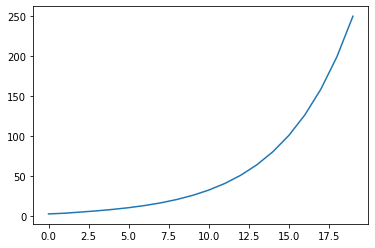

In [13]:
plt.plot(norm_list)

## 기울기 소실

In [14]:
N = 2
H = 3
T = 20

dh = np.ones((N,H))
np.random.seed(3)
Wh = np.random.randn(H,H) * 0.5

norm_list = []
for t in range(T) :
    dh = np.matmul(dh,Wh.T) # T번 반복됨
    norm = np.sqrt(np.sum(dh**2)) / N # 미니배치(N개)의 평균 'L2노름'
    norm_list.append(norm)

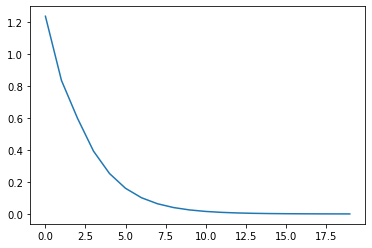

In [15]:
plt.plot(norm_list)

## 기울기 폭발 대책 - 기울기 클리핑

In [19]:
dW1 = np.random.rand(3,3) * 10
dW2 = np.random.rand(3,3) * 10
grads = [dW1, dW2]
max_norm = 5.0

def clip_grads(grads, max_norm) :
    total_norm = 0
    for grad in grads :
        total_norm += np.sum(grad**2)
    total_norm = np.sqrt(total_norm)
    
    rate = max_norm / (total_norm + 1e-6)
    if rate < 1 :
        for grad in grads :
            grad *= rate
            

## LSTM 구현

In [21]:
class LSTM :
    def __init__(self, Wx, Wh, b) :
        self.params = [Wx, Wh, b]
        self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)]
        self.cache = None
    
    def forward(self, x, h_prev, c_prev) :
        Wx, Wh, b = self.params
        N, H  = h_prev.shape
        
        # 아핀변환
        A = np.matmul(x, Wx) + np.matmul(h_prev, Wh) + b
        
        # slice
        f = A[:, :H]
        g = A[:, H:2*H]
        i = A[:, 2*H:3*H]
        o = A[:, 3*H:]
        
        f = sigmoid(f)
        g = np.tanh(g)
        i = sigmoid(i)
        o = sigmoid(o)
        
        c_next = f*c_prev + g*i
        h_next = o*np.tanh(c_next)
        
        self.cache = (x, h_prev, c_prev, i, f, o, g, c_next)
        return h_next, c_next